# DATA processing

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

dataset = datasets.load_boston()
features = dataset.data
labels = dataset.target

Nsplit = 50
X_train, y_train = features[:-Nsplit], labels[:-Nsplit]
X_test, y_test = features[-Nsplit:], labels[-Nsplit:]
#################  train process ####################
mean = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)
[data_num,feature_num]=np.shape(X_train)
for i in range(data_num):
    for j in range(feature_num):
        X_train[i][j] = (X_train[i][j]-mean[j])/std[j]
X_train = np.insert(X_train,0,1,axis = 1)
#mean = np.mean(X_train,axis=0)
#std = np.std(X_train,axis=0) 
[data_num,feature_num]=np.shape(X_train)
X_train =X_train.reshape(data_num,feature_num)
y_train =y_train.reshape(data_num,1)



###################    text process ######################
[data_num2,feature_num2]=np.shape(X_test)
for i in range(data_num2):
    for j in range(feature_num2):
        X_test[i][j] = (X_test[i][j]-mean[j])/std[j]
X_test = np.insert(X_test,0,1,axis = 1)

[data_num2,feature_num2]=np.shape(X_test)
X_test =X_test.reshape(data_num2,feature_num2)
y_test =y_test.reshape(data_num2,1)

In [2]:
X_train_0 = np.ones((data_num,1))
X_train_1 = X_train
X_train_2 = np.append(X_train,np.delete(X_train**2,0,1),axis = 1)
X_train_3 = np.append(X_train_2,np.delete(X_train**3,0,1),axis = 1)
X_train_4 = np.append(X_train_3,np.delete(X_train**4,0,1),axis = 1)
X_test_0 = np.ones((data_num2,1))
X_test_1 = X_test
X_test_2 = np.append(X_test,np.delete(X_test**2,0,1),axis = 1)
X_test_3 = np.append(X_test_2,np.delete(X_test**3,0,1),axis = 1)
X_test_4 = np.append(X_test_3,np.delete(X_test**4,0,1),axis = 1)
error_train=[]
error_test=[]


# Get weighted vector and error

In [3]:
w_pred0 = np.linalg.pinv(X_train_0).dot(y_train)
er_train= (X_train_0@w_pred0-y_train)
er_test = (X_test_0@w_pred0-y_test)
error_train.append(1/data_num*(er_train.T@er_train))
error_test.append(1/data_num2*(er_test.T@er_test))

In [4]:
w_pred1 = np.linalg.pinv(X_train_1).dot(y_train)
er_train= (X_train_1@w_pred1-y_train)
er_test = (X_test_1@w_pred1-y_test)
error_train.append(1/data_num*(er_train.T@er_train))
error_test.append(1/data_num2*(er_test.T@er_test))

In [5]:
w_pred2 = np.linalg.pinv(X_train_2).dot(y_train)
er_train= (X_train_2@w_pred2-y_train)
er_test = (X_test_2@w_pred2-y_test)
error_train.append(1/data_num*(er_train.T@er_train))
error_test.append(1/data_num2*(er_test.T@er_test))

In [6]:
w_pred3 = np.linalg.pinv(X_train_3).dot(y_train)
er_train= (X_train_3@w_pred3-y_train)
er_test = (X_test_3@w_pred3-y_test)
error_train.append(1/data_num*(er_train.T@er_train))
error_test.append(1/data_num2*(er_test.T@er_test))

In [7]:
w_pred4 = np.linalg.pinv(X_train_4).dot(y_train)
er_train= (X_train_4@w_pred4-y_train)
er_test = (X_test_4@w_pred4-y_test)
error_train.append(1/data_num*(er_train.T@er_train))
error_test.append(1/data_num2*(er_test.T@er_test))

# Plot RMSE 

[[[9.48269466]]

 [[4.81576126]]

 [[3.74817399]]

 [[3.57467131]]

 [[3.38306566]]]


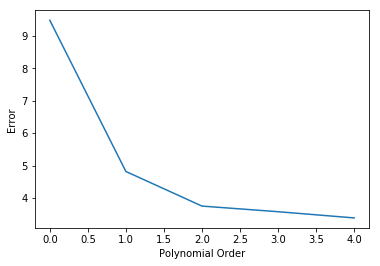

In [22]:
plt.plot(range(5),np.reshape(np.sqrt(error_train),(5,1)))

#plt.title("Error")
plt.xlabel('Polynomial Order')
plt.ylabel('Error')
#plt.savefig("Train_error VS ployminal order.PNG")
print(np.sqrt(error_train))

[[[  5.99400813]]

 [[  3.31157714]]

 [[  7.13793835]]

 [[  9.42793473]]

 [[130.46951778]]]


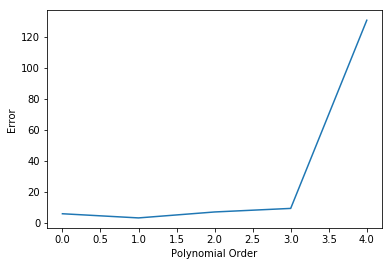

In [23]:
plt.plot(range(5),np.reshape(np.sqrt(error_test),(5,1)))
#plt.legend(labels = ['Test'], loc = 'best')
#plt.title("error VS ployminal order ")
plt.xlabel('Polynomial Order')
plt.ylabel('Error')
#plt.savefig("Teast_error VS ployminal order.PNG")
print(np.sqrt(error_test))

# Partial Data 20% 40% 60% 80% 100%

In [30]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

dataset = datasets.load_boston()
features = dataset.data
labels = dataset.target
Nsplit = 50
X_train, y_train = features[:-Nsplit], labels[:-Nsplit]
X_test, y_test = features[-Nsplit:], labels[-Nsplit:]


In [31]:
train_split = data_num*np.asarray([0.2,0.4,0.6,0.8,1])
train_split = [ int(i) for i in train_split]

error_train= []
error_test = []
for m in train_split:
    data = X_train[np.arange(m),:]
    data_mean =np.mean(data,axis=0)
    data_std =np.std(data,axis=0)
    
    X_test_new =X_test.copy()
    
    [a,b]=np.shape(data)
    [c,d]=np.shape(X_test_new)
    for i in range(a):
        for j in range(b): 
            if data_std[j]==0:
                continue
            else:
                data[i][j] = (data[i][j]-data_mean[j])/data_std[j]
    data = np.insert(data,0,1,axis = 1)
    
    y_train_part =y_train[np.arange(a)]
    y_train_part=np.reshape(y_train_part,(a,1))
    
    for p in range(c):
        for q in range(d):
            if data_std[q]==0:
                continue
            else:
                X_test_new[p][q] = (X_test_new[p][q]-data_mean[q])/data_std[q]    
    X_test_new = np.insert(X_test_new,0,1,axis = 1)
    w_pred = np.linalg.pinv(data).dot(y_train_part)
    er_train= data@w_pred-y_train_part
    error_train.append(np.sqrt(1/m*(er_train.T@er_train)))
    er_test = X_test_new@w_pred-np.reshape(y_test,(50,1))
    error_test.append(np.sqrt(1/50*(er_test.T@er_test)))

[array([[1.95149305]]), array([[2.96802007]]), array([[3.13937307]]), array([[3.04080629]]), array([[4.81576126]])]


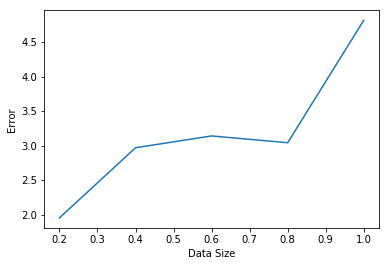

In [33]:
plt.plot([0.2,0.4,0.6,0.8,1],np.reshape(error_train,(5,1)))
#plt.title("Train_error VS Data size ")
plt.xlabel('Data Size')
plt.ylabel('Error')
#plt.legend(labels = ['Train'], loc = 'best')
#plt.savefig("Train_error VS Data size .PNG")
print(error_train)

[array([[30.12696201]]), array([[9.32135308]]), array([[7.46339832]]), array([[4.80841924]]), array([[3.31157714]])]


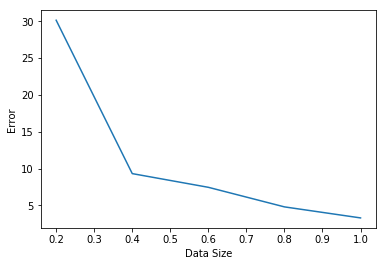

In [35]:
plt.plot([0.2,0.4,0.6,0.8,1],np.reshape(error_test,(5,1)))
#plt.title("error VS Data size ")
plt.xlabel('Data Size')
plt.ylabel('Error')
#plt.legend(labels = ['Test'], loc = 'best')
#plt.savefig('Train_error VS Data size.png') 
print(error_test)